# Predictive Modeling and Analysis

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
#Remove Warnings
warnings.filterwarnings('ignore')

In [3]:
#Reading csv
df=pd.read_csv("laptopPrice.csv")

# Data Understanding

In [4]:
df

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,135990,3 stars,0,0
819,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,144990,3 stars,0,0
820,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,149990,3 stars,0,0
821,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,142990,3 stars,0,0


In [5]:
df.shape

(823, 19)

In [6]:
#Displaying first 5 rows of data
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [7]:
#Displaying last 5 rows of data
df.tail()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
818,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,135990,3 stars,0,0
819,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,144990,3 stars,0,0
820,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,149990,3 stars,0,0
821,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,142990,3 stars,0,0
822,Lenovo,AMD,Ryzen 5,10th,8 GB,DDR4,512 GB,0 GB,DOS,64-bit,0 GB,ThinNlight,No warranty,No,No,57490,4 stars,18,4


In [8]:
#Display all statistical info of data
df.describe()

,Price,Number of Ratings,Number of Reviews
count,823.000000,823.000000,823.000000
mean,76745.177400,315.301337,37.609964
std,45101.790525,1047.382654,121.728017
min,16990.000000,0.000000,0.000000
25%,46095.000000,0.000000,0.000000
50%,64990.000000,17.000000,2.000000
75%,89636.000000,139.500000,18.000000
max,441990.000000,15279.000000,1947.000000


In [9]:
#Display structural information of data
df_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

## Checking uniques values of columns

In [10]:
df["weight"].value_counts()

weight
Casual        520
ThinNlight    264
Gaming         39
Name: count, dtype: int64

In [11]:
df["brand"].unique()

array(['ASUS', 'Lenovo', 'acer', 'Avita', 'HP', 'DELL', 'MSI', 'APPLE'],
      dtype=object)

In [12]:
df["Touchscreen"].value_counts()

Touchscreen
No     726
Yes     97
Name: count, dtype: int64

In [13]:
df["processor_gnrtn"].value_counts()

processor_gnrtn
11th             334
Not Available    225
10th             204
8th               41
7th                9
9th                6
12th               3
4th                1
Name: count, dtype: int64

In [14]:
df["processor_gnrtn"].unique()

array(['10th', 'Not Available', '11th', '7th', '8th', '9th', '4th',
       '12th'], dtype=object)

In [15]:
df["ssd"].value_counts()

ssd
512 GB     398
256 GB     184
0 GB       124
1024 GB    111
128 GB       3
2048 GB      2
3072 GB      1
Name: count, dtype: int64

In [16]:
df["hdd"].value_counts()

hdd
0 GB       621
1024 GB    160
512 GB      41
2048 GB      1
Name: count, dtype: int64

In [17]:
df["ram_gb"].value_counts()

ram_gb
8 GB     418
4 GB     226
16 GB    177
32 GB      2
Name: count, dtype: int64

In [18]:
df["graphic_card_gb"].value_counts()

graphic_card_gb
0 GB    577
4 GB    128
2 GB     67
6 GB     37
8 GB     14
Name: count, dtype: int64

In [19]:
df["rating"].value_counts()

rating
4 stars    444
3 stars    352
5 stars     16
2 stars      9
1 star       2
Name: count, dtype: int64

In [20]:
df["os_bit"].value_counts()

os_bit
64-bit    714
32-bit    109
Name: count, dtype: int64

In [21]:
df["brand"].value_counts()

brand
ASUS      249
DELL      151
Lenovo    144
HP        136
acer       51
MSI        50
APPLE      28
Avita      14
Name: count, dtype: int64

In [22]:
df["processor_brand"].value_counts()

processor_brand
Intel    610
AMD      189
M1        24
Name: count, dtype: int64

In [23]:
df["processor_name"].value_counts()

processor_name
Core i5         290
Core i3         164
Core i7         110
Ryzen 5          82
Ryzen 7          56
Ryzen 3          26
Ryzen 9          26
Celeron Dual     24
M1               24
Pentium Quad     13
Core i9           8
Name: count, dtype: int64

In [24]:
df["ram_type"].value_counts()

ram_type
DDR4       709
LPDDR4X     58
LPDDR4      27
LPDDR3      14
DDR5         8
DDR3         7
Name: count, dtype: int64

In [25]:
df["os"].value_counts()

os
Windows    779
Mac         28
DOS         16
Name: count, dtype: int64

In [26]:
df["Touchscreen"].value_counts()

Touchscreen
No     726
Yes     97
Name: count, dtype: int64

In [27]:
df["msoffice"].value_counts()

msoffice
No     542
Yes    281
Name: count, dtype: int64

In [28]:
df["warranty"].value_counts()

warranty
1 year         509
No warranty    278
2 years         23
3 years         13
Name: count, dtype: int64

In [29]:
df.isnull().sum()

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

In [30]:
#Checking for duplicate values
df.duplicated().sum()

21

In [31]:
#Dropping duplicate values
df = df.drop_duplicates()

In [32]:
#Checking duplicate rows after deletion
df.duplicated().sum()

0

# Feature Engineering

## convert categorical columns into numerical

In [33]:
# Convert ram_gb from categorical to numeric 
df["ram_gb"] = df["ram_gb"].str.replace(" GB", "").astype(int)
# Convert ssd from categorical to numeric 
df["ssd"] = df["ssd"].str.replace(" GB", "").astype(int)
# Convert hdd from categorical to numeric 
df["hdd"] = df["hdd"].str.replace(" GB", "").astype(int)
# Convert graphic_card_gb from categorical to numeric 
df["graphic_card_gb"] = df["graphic_card_gb"].str.replace(" GB", "").astype(int)
# Convert weight from categorical to numeric 
weight_mapping = {"ThinNlight": 0, "Casual": 1, "Gaming": 2}
df["weight"] = df["weight"].map(weight_mapping)
# Convert rating from categorical to numeric 
df["rating"] = df["rating"].str.extract("(\d)").astype(float)
# Convert processor_gnrtn from categorical to numeric 
df['processor_gnrtn'] = df['processor_gnrtn'].replace('Not Available', '11th')
df["processor_gnrtn"] = pd.to_numeric(df["processor_gnrtn"].str.extract("(\d+)")[0], errors='coerce')
# Convert os_bit from categorical to numeric 
df["os_bit"] = df["os_bit"].str.replace("-bit", "").astype(int)
# Convert brand from categorical to numeric 
df["brand"] = df["brand"].astype("category")
# Convert processor_brand from categorical to numeric 
df["processor_brand"] = df["processor_brand"].astype("category")
# Convert processor_name from categorical to numeric 
processor_mapping = {
    "Celeron Dual": 0, "Pentium Quad": 1, "Core i3": 2, "Ryzen 3": 3, 
    "Core i5": 4, "Ryzen 5": 5, "Core i7": 6, "Ryzen 7": 7, 
    "Ryzen 9": 8, "Core i9": 9, "M1": 10
}
df["processor_name"] = df["processor_name"].map(processor_mapping)
#df["processor_name"] = df["processor_name"].astype("category")
ram_mapping = {
    "DDR3": 0, "LPDDR3": 1, "LPDDR4": 2, "LPDDR4X": 3, 
    "DDR4": 4, "DDR5": 5
}
# Convert ram_type from categorical to numeric 
df["ram_type"] = df["ram_type"].map(ram_mapping)
#df["ram_type"] = df["ram_type"].astype("category")
# Convert os from categorical to numeric 
#df["os"] = df["os"].astype("category")
os_mapping = {"DOS": 0, "Mac": 1, "Windows": 2}
df["os"] = df["os"].map(os_mapping)
# Convert Touchscreen from categorical to numeric 
df["Touchscreen"] = df["Touchscreen"].map({"No": 0, "Yes": 1})
# Convert msoffice from categorical to numeric 
df["msoffice"] = df["msoffice"].map({"No": 0, "Yes": 1})
# Convert warranty from categorical to numeric 
warranty_mapping = {"No warranty": 0, "1 year": 1, "2 years": 2, "3 years": 3}
df["warranty"] = df["warranty"].map(warranty_mapping)

In [34]:
#Creating new columns using old ones
df["total_storage"] = df["ssd"] + df["hdd"] 
df["performance_score"] = (
    df["ram_gb"] * 2 + df["processor_gnrtn"] * 3 + df["graphic_card_gb"] * 2 + df["ssd"] * 1.5
)  

In [35]:
#Dropping irrelevant columns
df.drop(columns=["weight", "ssd", "hdd", "Number of Ratings", "ram_gb"], inplace=True)

# Data Visualization

<Figure size 1200x800 with 0 Axes>

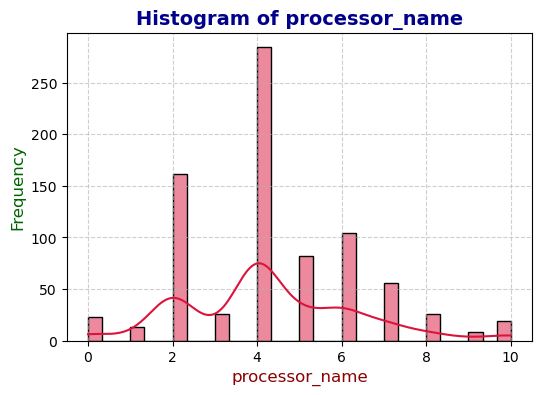

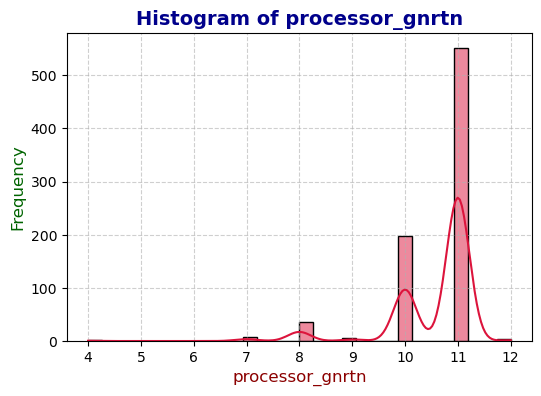

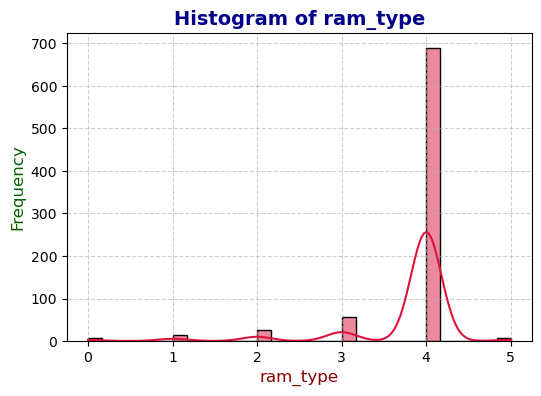

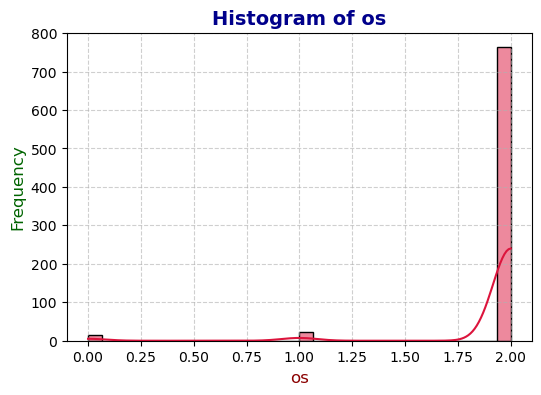

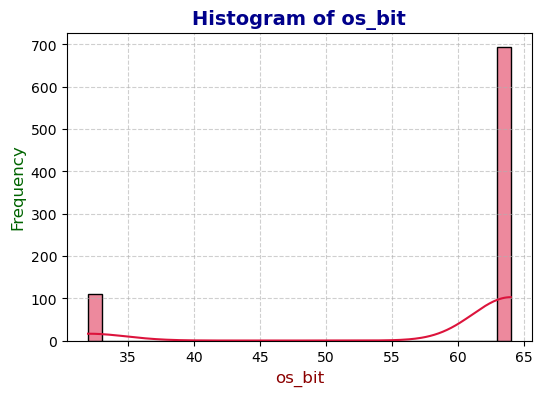

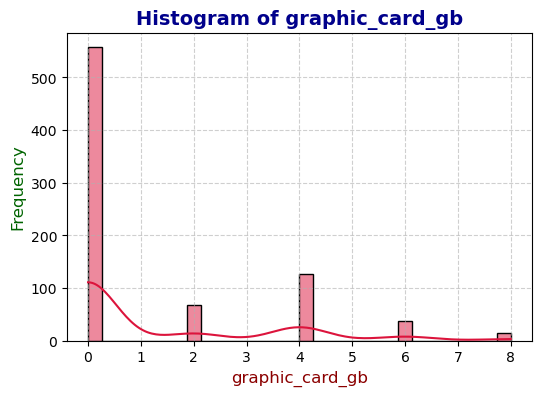

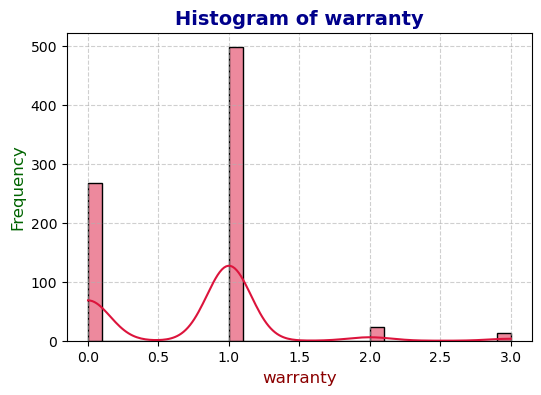

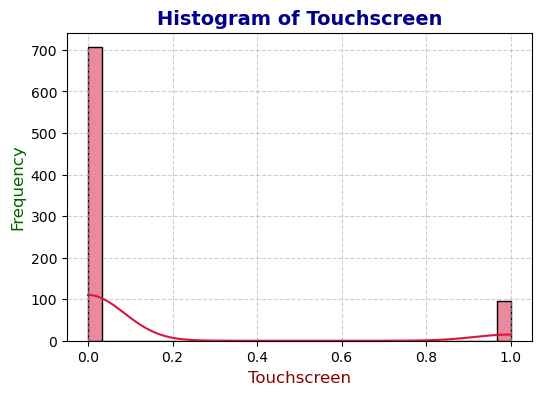

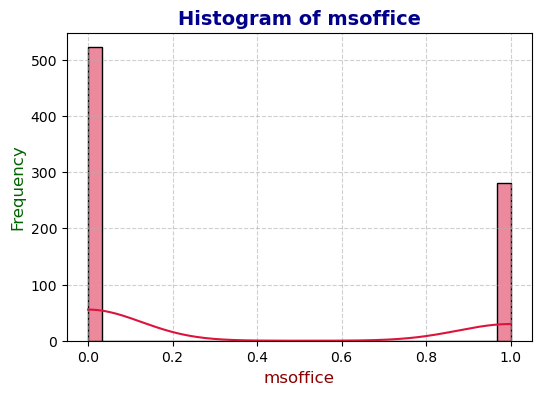

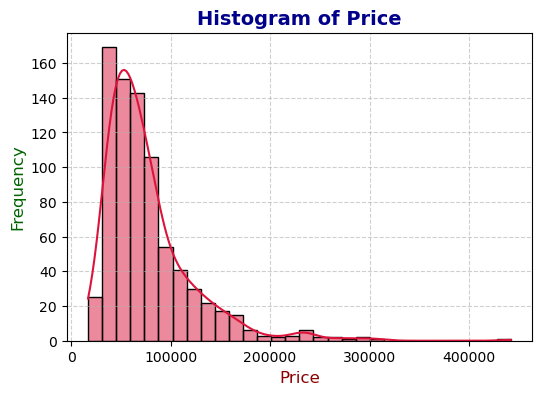

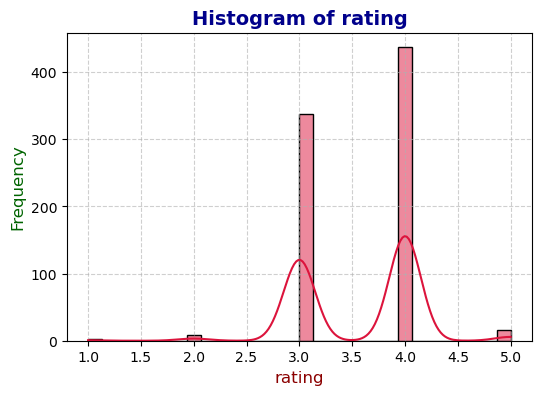

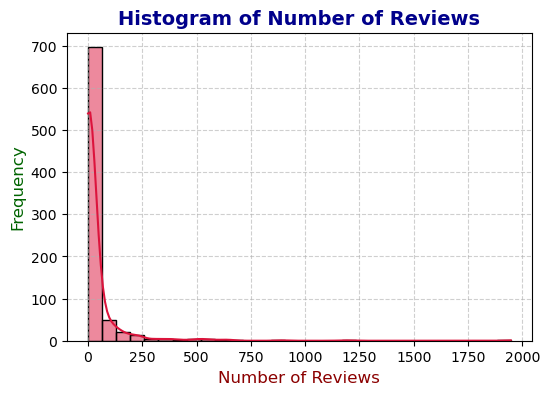

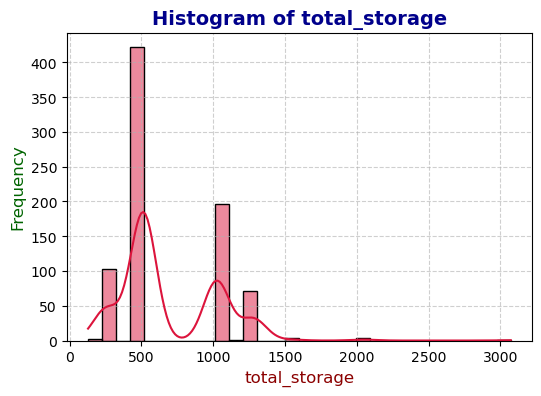

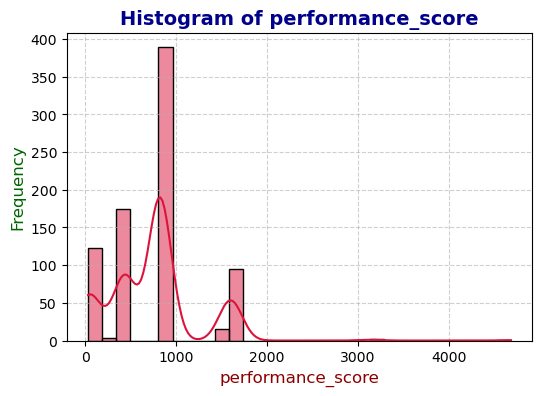

In [36]:
#Creating histplot for checking skewness
df_numeric = df.select_dtypes(include=["number"])
plt.figure(figsize=(12, 8))
for i, col in enumerate(df_numeric.columns):  
    plt.figure(figsize=(6, 4))
    sns.histplot(df_numeric[col], kde=True, bins=30, color="crimson") 
    plt.title(f"Histogram of {col}", fontsize=14, fontweight="bold", color="darkblue")
    plt.xlabel(col, fontsize=12, color="darkred")
    plt.ylabel("Frequency", fontsize=12, color="darkgreen")
    plt.grid(True, linestyle="--", alpha=0.6)  
    plt.show()

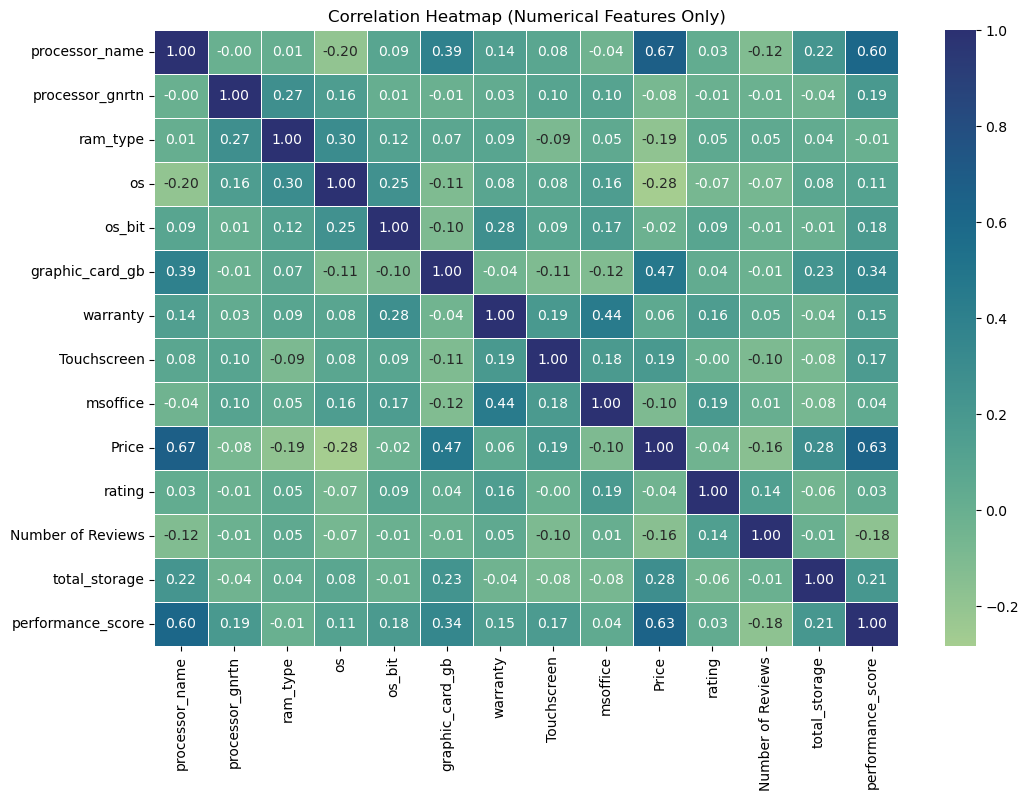

In [37]:
#Plotting heatmap to calculate correlation between columns
df_numeric = df.select_dtypes(include=["number"])
corr_matrix = df_numeric.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="crest", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Numerical Features Only)")
plt.show()

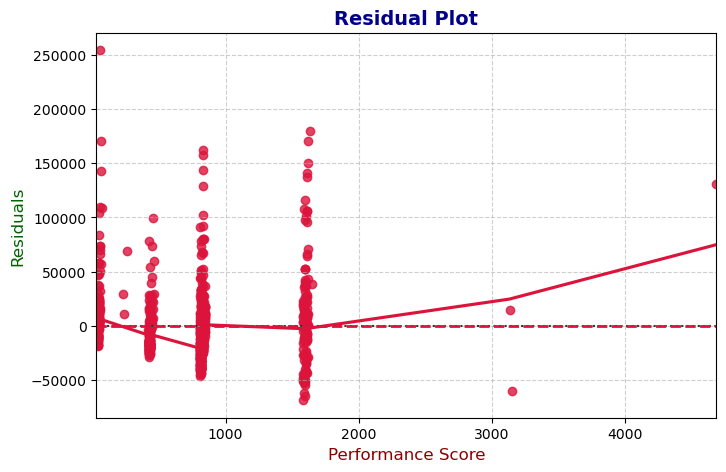

In [38]:
#Plotting Residual plot
import statsmodels.api as sm
X_sm = sm.add_constant(df["performance_score"])
model = sm.OLS(df["Price"], X_sm).fit()
residuals = model.resid
plt.figure(figsize=(8, 5))
sns.residplot(x=df["performance_score"], y=residuals, lowess=True, color="crimson")  
plt.axhline(0, color="crimson", linestyle="--", linewidth=2)  
plt.title("Residual Plot", fontsize=14, fontweight="bold", color="darkblue")
plt.xlabel("Performance Score", fontsize=12, color="darkred")
plt.ylabel("Residuals", fontsize=12, color="darkgreen")
plt.grid(True, linestyle="--", alpha=0.6)  
plt.show()

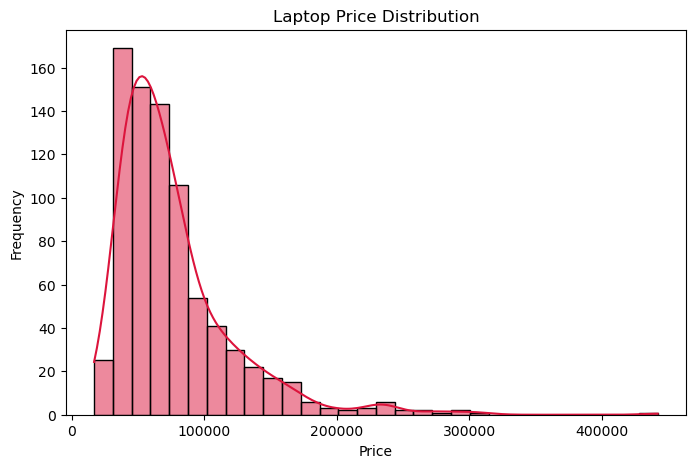

In [39]:
# Price Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Price"], bins=30, kde=True, color="crimson")
plt.title("Laptop Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

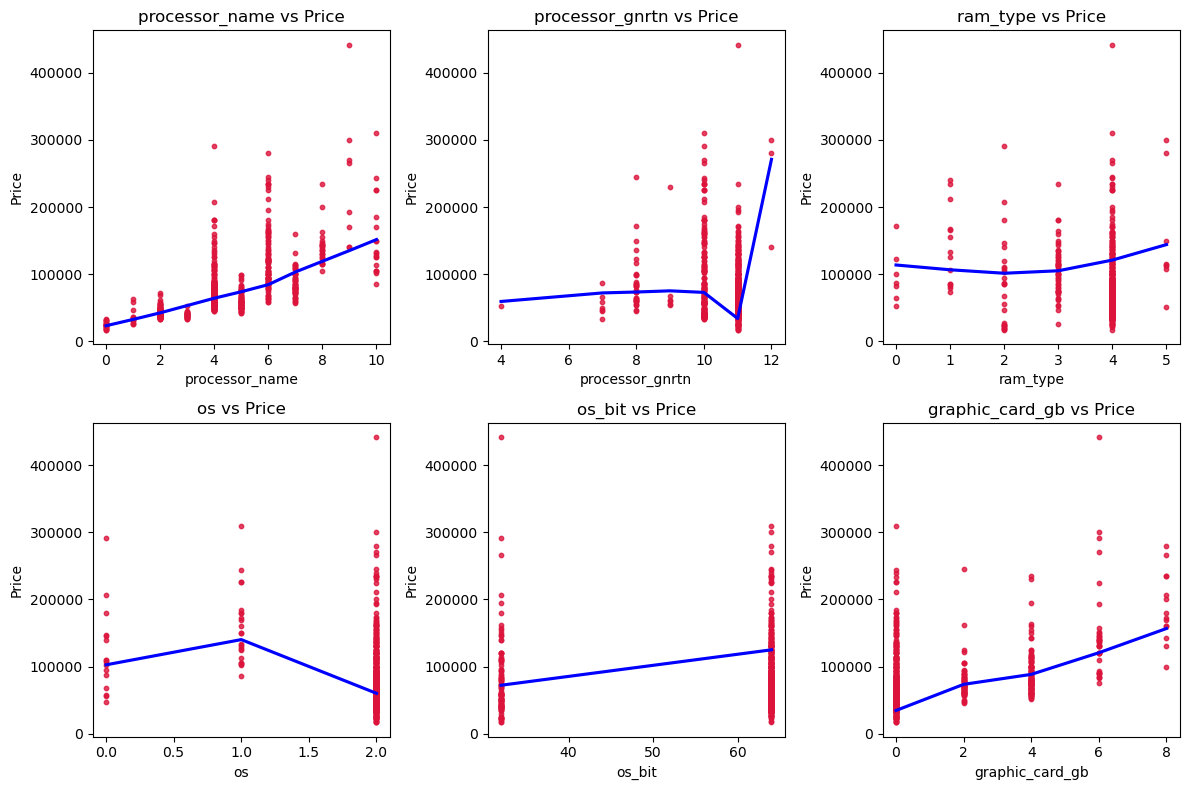


 Model Comparison:
Linear Regression R²: 0.6899
Decision Tree R²: 0.7600
 Data appears Mostly Linear.


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
target = "Price"  
num_features = df.select_dtypes(include=[np.number]).columns.tolist()
num_features.remove(target)  
plt.figure(figsize=(12, 8))
for i, feature in enumerate(num_features[:6]):
    plt.subplot(2, 3, i + 1)
    sns.regplot(x=df[feature], y=df[target], lowess=True, scatter_kws={"s": 10, "color": "crimson"}, line_kws={"color": "blue"})
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f"{feature} vs {target}")
plt.tight_layout()
plt.show()
nonlinear_features = []
for feature in num_features:
    poly = PolynomialFeatures(degree=2, include_bias=False)
    transformed_feature = poly.fit_transform(df[[feature]])
    df_poly = pd.DataFrame(transformed_feature, columns=[feature, f"{feature}²"])

    corr_original = df[feature].corr(df[target])
    corr_poly = df_poly.corrwith(df[target]).max()

    if abs(corr_poly) > abs(corr_original) + 0.1:  # If polynomial improves correlation
        nonlinear_features.append(feature)
        print(f"🔹 {feature} shows a Nonlinear Relationship (Corr Improved: {corr_original:.2f} → {corr_poly:.2f})")
X = df[num_features]
y = df[target]
lin_model = LinearRegression().fit(X, y)
y_pred_lin = lin_model.predict(X)
r2_lin = r2_score(y, y_pred_lin)
tree_model = DecisionTreeRegressor(max_depth=4, random_state=42).fit(X, y)
y_pred_tree = tree_model.predict(X)
r2_tree = r2_score(y, y_pred_tree)

print(f"\n Model Comparison:")
print(f"Linear Regression R²: {r2_lin:.4f}")
print(f"Decision Tree R²: {r2_tree:.4f}")

if r2_tree > r2_lin + 0.1:
    print(" Significant Nonlinear Relationships Detected! Consider Tree-based Models.")
else:
    print(" Data appears Mostly Linear.")



# Model Building and Evaluation

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_type', 'os', 'os_bit', 'graphic_card_gb', 'warranty',
       'Touchscreen', 'msoffice', 'rating', 'Number of Reviews',
       'total_storage', 'performance_score'],
      dtype='object')

XGBoost Performance:
  - R² Score (Train)      : 0.9487
  - R² Score (Test)       : 0.8550
  - R² Score (Validation) : 0.8748
  - RMSE (Test)           : 0.1836
  - RMSE (Validation)     : 0.1759
  - MAE (Test)            : 0.1311
  - MAE (Validation)      : 0.1237

Random Forest Performance:
  - R² Score (Train)      : 0.9487
  - R² Score (Test)       : 0.8309
  - R² Score (Validation) : 0.8589
  - RMSE (Test)           : 0.1983
  - RMSE (Validation)     : 0.1867
  - MAE (Test)            : 0.1387
  - MAE (Validation)      : 0.1329

Lasso Regression Performance:
  - R² Score (Train)      : 0.8074
  - R² Score (Test)       : 0.7214
  - R² Score (Validation) : 0.7975
  - RMSE (Test)           : 0.2546
  - RMSE (Validati

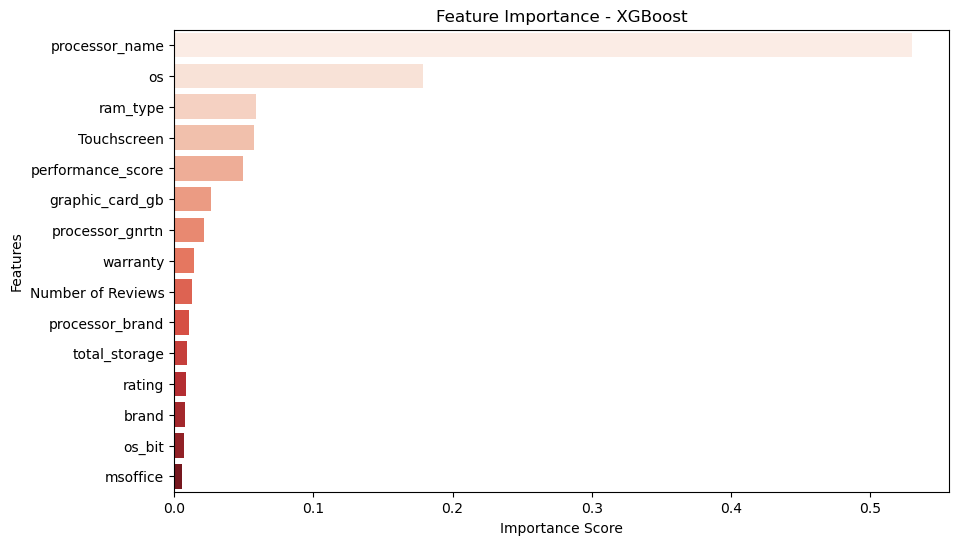

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from category_encoders import TargetEncoder
X = df.drop(columns=['Price'])
y = df['Price']
print(X.columns)
y = np.log1p(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_transform_cols = ['rating', 'Number of Reviews', 'total_storage', 'performance_score','processor_gnrtn','graphic_card_gb']
for col in log_transform_cols:
    X_train[col] = np.log1p(X_train[col])  
    X_test[col] = np.log1p(X_test[col])
categorical_cols = ['brand', 'processor_brand']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    label_encoders[col] = le  
models = {
    "XGBoost": XGBRegressor(
        objective="reg:squarederror",
        n_estimators=500,
        learning_rate=0.04,
        max_depth=6,
        reg_alpha=1.0,
        reg_lambda=1.5,
        subsample=0.6,
        colsample_bytree=0.7,
        random_state=42,
        enable_categorical=True
    ),
    "Random Forest": RandomForestRegressor(
        n_estimators=500,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42
    ),
    "Lasso Regression": Lasso(alpha=0.01), 
    "Linear Regression": LinearRegression()
}
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mae_test = mean_absolute_error(y_test, y_pred_test)
    cv_r2 = np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='r2'))
    cv_rmse = np.sqrt(-np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')))
    cv_mae = -np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error'))
    results[name] = {
        "R² Train": r2_train,
        "R² Test": r2_test,
        "R² CV (Validation)": cv_r2,
        "RMSE Test": rmse_test,
        "RMSE CV (Validation)": cv_rmse,
        "MAE Test": mae_test,
        "MAE CV (Validation)": cv_mae
    }
    print(f"\n{name} Performance:")
    print(f"  - R² Score (Train)      : {r2_train:.4f}")
    print(f"  - R² Score (Test)       : {r2_test:.4f}")
    print(f"  - R² Score (Validation) : {cv_r2:.4f}")
    print(f"  - RMSE (Test)           : {rmse_test:.4f}")
    print(f"  - RMSE (Validation)     : {cv_rmse:.4f}")
    print(f"  - MAE (Test)            : {mae_test:.4f}")
    print(f"  - MAE (Validation)      : {cv_mae:.4f}")
X_perf = df[["performance_score"]]
y_price = df["Price"]
lin_model = LinearRegression()
lin_model.fit(X_perf, y_price)
y_pred_lin = lin_model.predict(X_perf)
r2_lin = r2_score(y_price, y_pred_lin)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_perf)
poly_model = LinearRegression()
poly_model.fit(X_poly, y_price)
y_pred_poly = poly_model.predict(X_poly)
r2_poly = r2_score(y_price, y_pred_poly)
print(f"R² for Linear Model: {r2_lin:.4f}")
print(f"R² for Polynomial Model: {r2_poly:.4f}")
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
rfe = RFE(xgb_model, n_features_to_select=10)
X_selected = rfe.fit_transform(X_train, y_train)
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)
xgb_model.fit(X_train, y_train)
feature_importances = xgb_model.feature_importances_
feat_imp_df = pd.DataFrame({"Feature": X_train.columns, "Importance": feature_importances})
feat_imp_df = feat_imp_df.sort_values(by="Importance", ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feat_imp_df, palette="Reds")
plt.title("Feature Importance - XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()